In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
df_ticket = pd.read_csv('/content/drive/MyDrive/file_practice/movie_ticket_data/ticket_history.csv')
df_customer = pd.read_csv('/content/drive/MyDrive/file_practice/movie_ticket_data/customer.csv')
df_device = pd.read_csv('/content/drive/MyDrive/file_practice/movie_ticket_data/device_detail.csv')
df_status = pd.read_csv('/content/drive/MyDrive/file_practice/movie_ticket_data/status_detail.csv')
df_campaign = pd.read_csv('/content/drive/MyDrive/file_practice/movie_ticket_data/campaign.csv')

# **1. Data Cleaning**

In [ ]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [ ]:
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [ ]:
df_ticket.drop_duplicates(inplace = True)

In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

In [ ]:
df_customer.duplicated().sum()

0

In [ ]:
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [ ]:
# Create function that calculate the null %
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by=['null_rate'], ascending=False)

In [ ]:
calc_null_rate(df_device)

,null_count,null_rate
model,7139,0.051029
device_number,1,0.000007
platform,0,0.000000


In [ ]:
# Remove NA in device_number
df_device.dropna(subset = ['device_number'], inplace = True)

# Replace NA in model with Unknown
df_device.fillna({'model' : 'unknown'}, inplace = True)

In [ ]:
df_device.duplicated().sum()

0

In [ ]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   description  8 non-null      object
 2   error_group  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [ ]:
df_status.fillna({'error_group' : 'unknown'}, inplace = True)

In [ ]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


# **2. Join tables**

In [ ]:
df_1 = pd.merge(df_ticket, df_customer, how = 'left', on = 'customer_id')
df_2 = pd.merge(df_1, df_device, how = 'left', on = 'device_number')
df_3 = pd.merge(df_2, df_status, how = 'left', on = 'status_id')
df_joined = pd.merge(df_3, df_campaign, how = 'left', on = 'campaign_id')

In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154725 entries, 0 to 154724
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
 12  usergender      154725 non-null  object        
 13  dob             154725 non-null  datetime64[ns]
 14  model           154647 non-null  obj

In [ ]:
df_joined_1 = df_joined.copy()

In [ ]:
df_joined.fillna({'campaign_type':'no campaign' }, inplace = True)
df_joined.fillna({'platform':'unknown' }, inplace = True)
df_joined.fillna({'model':'unknown' }, inplace = True)

# **3. Orders trend**

In [ ]:
# Order trends
df_joined['year_month'] = df_joined['time'].dt.strftime('%Y - %m')
df_joined['Hour'] = pd.to_datetime(df_joined['time']).dt.hour
df_joined['Weekdays'] = pd.to_datetime(df_joined['time']).dt.weekday
df_joined['Month'] = pd.to_datetime(df_joined['time']).dt.month

**Order trends by Hour**

In [ ]:
# Data
df_hour = df_joined.groupby('Hour').agg(
    total_order = ('ticket_id', 'count')
).reset_index().sort_values(by = 'Hour', ascending = False)

**Order trends by Weekday**

In [ ]:
df_joined['Weekdays'] = df_joined['Weekdays'].apply(lambda x: 'Monday' if x == 0
                                                              else 'Tuesday' if x == 1
                                                              else 'Wednesday' if x == 2
                                                              else 'Thursday' if x == 3
                                                              else 'Friday' if x == 4
                                                              else 'Saturday' if x == 5
                                                              else 'Sunday')

In [ ]:
order_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Data
df_weekday = df_joined.groupby('Weekdays').agg(
    total_order = ('ticket_id', 'count')
).reset_index()

# Order weekdays
df_weekday['Weekdays'] = pd.Categorical(df_weekday['Weekdays'], categories = order_weekday, ordered = True)
df_weekday = df_weekday.sort_values(by = 'Weekdays')

**Order trends by Month**

In [ ]:
df_month = df_joined.groupby('Month').agg(
    total_order = ('ticket_id', 'count')
).reset_index().sort_values(by = 'Month', ascending = False)

Text(0.5, 1.0, 'Order trends by Month')

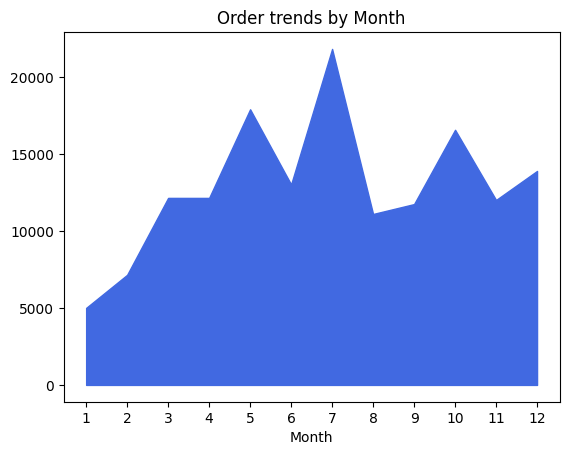

In [ ]:
plt.fill_between(df_month['Month'], df_month['total_order'], color = 'royalblue')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.title('Order trends by Month')

**Order trends by Year**

In [ ]:
# Time dimension

# Define time range
start_date = '2019-01-01'
end_date = '2022-12-31'

# Create time range
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Data
list_month = date_range.month
list_month_name = date_range.strftime('%B')
list_year = date_range.year
list_year_month = date_range.strftime('%Y - %m')

# Create time dataframe
dim_time = pd.DataFrame({
    'month_number': list_month,
    'month_name': list_month_name,
    'year': list_year,
    'year_month': list_year_month
})

In [ ]:
# Data
df_time_month = (
    pd.merge(dim_time, df_joined, how = 'left', on = 'year_month')
    .groupby('year_month')
    .agg(total_order = ('ticket_id', 'count'))
    .reset_index()
)
df_time_month.replace(0 , np.NaN, inplace = True)

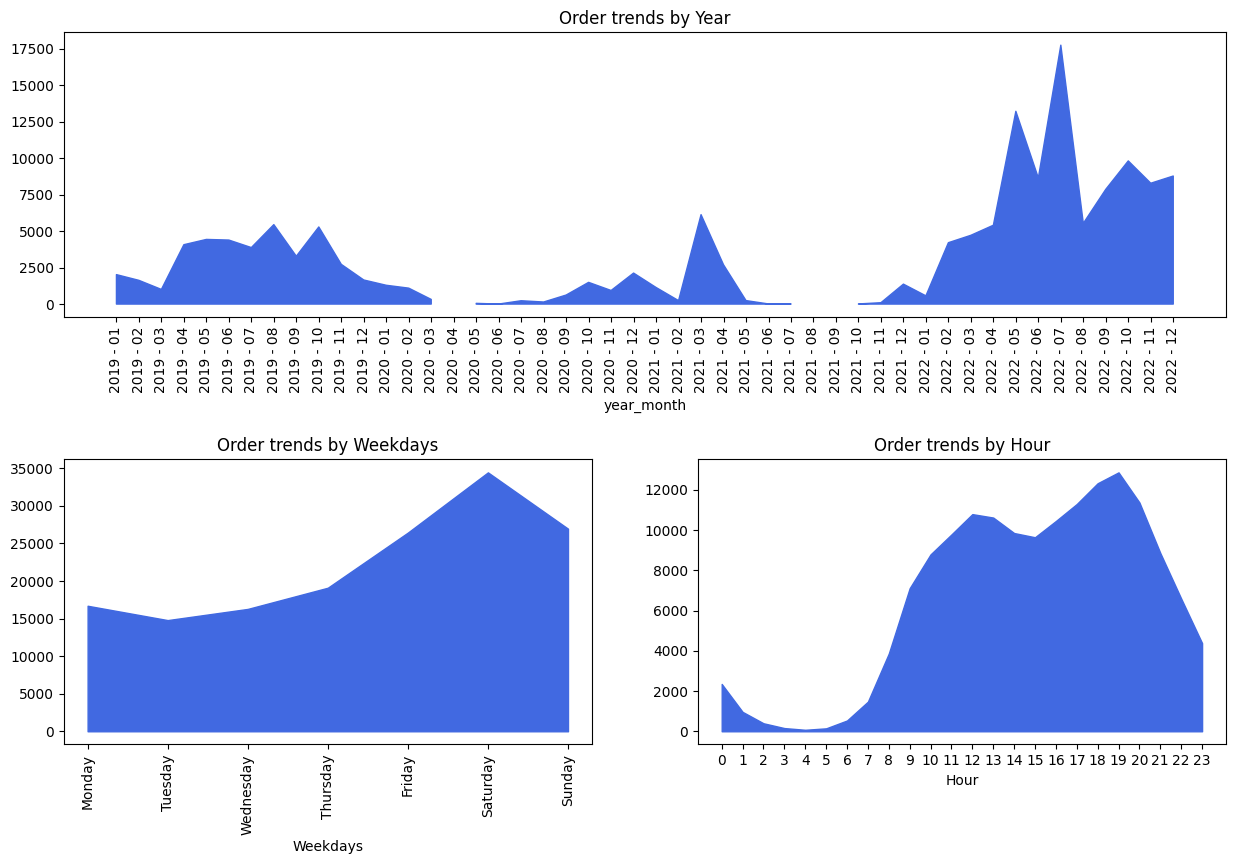

In [ ]:
plt.figure(figsize = (15, 8))

# Order trends by Year
ax1 = plt.subplot(2, 1, 1)
plt.fill_between(df_time_month['year_month'], df_time_month['total_order'], color = 'royalblue')
plt.xlabel('year_month')
plt.xticks(rotation = 90)
plt.title('Order trends by Year')

# Order trends by Hour
ax2 = plt.subplot(2, 2, 4)
plt.fill_between(df_hour['Hour'], df_hour['total_order'], color = 'royalblue')
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.title('Order trends by Hour')

# Order trends by Weekdays
ax3 = plt.subplot(2, 2, 3)
plt.fill_between(df_weekday['Weekdays'], df_weekday['total_order'], color = 'royalblue')
plt.xlabel('Weekdays')
plt.xticks(rotation = 90)
plt.title('Order trends by Weekdays')

plt.subplots_adjust( hspace = 0.5, top= 1.0)

# **4. Customer portrait**

**Age and Gender Distribution**

In [ ]:
# Calculate customers age
current_date = datetime.now()

df_joined['age_days'] = (current_date - df_joined['dob']).dt.days
df_joined['age'] = round(df_joined['age_days'] / 365.25, 0)

Text(0.5, 1.0, 'Age Distribution')

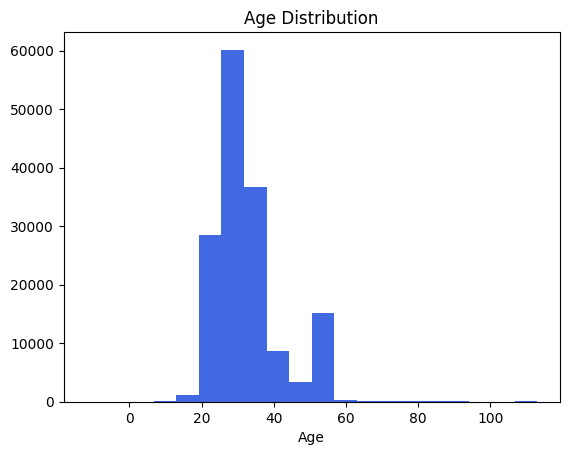

In [ ]:
# Age Distribution
plt.hist(df_joined['age'], bins = 20, color = 'royalblue')
plt.xlabel('Age')
plt.title('Age Distribution')

In [ ]:
df_joined[(df_joined['age'].between(25, 37)) & (df_joined['status_id'] == 1)]['customer_id'].count() / df_joined[df_joined['status_id'] == 1]['customer_id'].count()

0.6773240374329551

In [ ]:
df_joined[(df_joined['usergender'] == 'Not verify') & (df_joined['status_id'] == 1)]['customer_id'].count() / df_joined[df_joined['status_id'] == 1]['customer_id'].count()

0.10373357071791381

In [ ]:
df_joined[(df_joined['age'].between(37, 54)) & (df_joined['status_id'] == 1)]['customer_id'].count() / df_joined[df_joined['status_id'] == 1]['customer_id'].count()

0.10106299418756873

In [ ]:
df_joined[(df_joined['usergender'] == 'Not verify')]['age']

8         55.0
123       55.0
131       55.0
169       25.0
176       27.0
          ... 
154717    55.0
154718    55.0
154719    55.0
154723    55.0
154724    55.0
Name: age, Length: 15744, dtype: float64

In [ ]:
df_joined['usergender'].unique()

array(['Male', 'Not verify', 'Female'], dtype=object)

In [ ]:
df_gender = df_joined.groupby('usergender').agg(
    total_cus = ('customer_id', 'nunique')
).reset_index()

Text(0.5, 1.0, 'Genders pct')

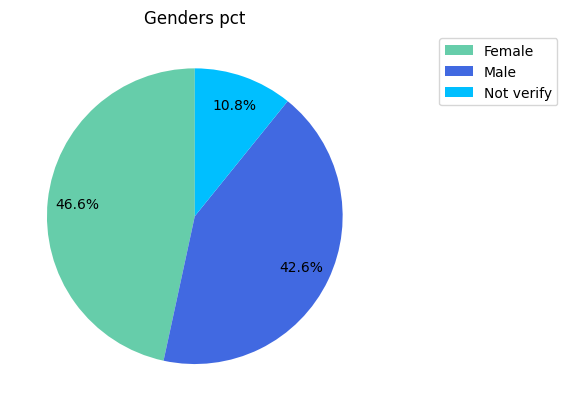

In [ ]:
# Pie chart
plt.pie(df_gender['total_cus'],
        colors = df_gender['usergender'].replace({ 'Male': 'royalblue',  'Female': 'mediumaquamarine', 'Not verify': 'deepskyblue'}),
        autopct = '%1.01f%%',
        startangle = 90,
        pctdistance = 0.8)
plt.legend(df_gender['usergender'], bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Genders pct')

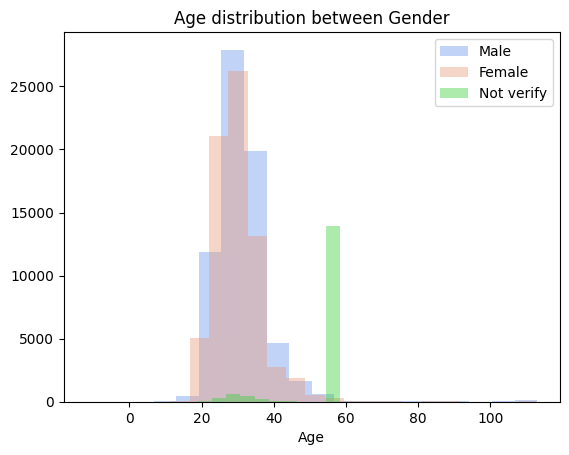

In [ ]:
# Data
male_age = df_joined[df_joined['usergender'] == 'Male']['age']
female_age = df_joined[df_joined['usergender'] == 'Female']['age']
not_verify_age = df_joined[df_joined['usergender'] == 'Not verify']['age']

# Visualize
plt.hist(male_age, bins = 20, color = 'cornflowerblue', alpha = 0.4, label = 'Male')
plt.hist(female_age, bins = 20, color = 'darksalmon', alpha = 0.4, label = 'Female')
plt.hist(not_verify_age, bins = 20, color = 'limegreen', alpha = 0.4, label = 'Not verify')

# Settings
plt.xlabel('Age')
plt.title('Age distribution between Gender')
plt.legend()
plt.show()

**Generations**

In [ ]:
df_joined['Generations'] = df_joined['age'].apply(lambda x: 'Gen Z' if x <= 29
                                                             else 'Gen Y' if x <= 45
                                                             else 'Gen X' if x <= 65
                                                             else 'Baby Boomer')

In [ ]:
df_gen = df_joined.groupby('Generations').agg(
    total_cus = ('customer_id', 'nunique')
).reset_index()

Text(0.5, 1.0, 'Generations pct')

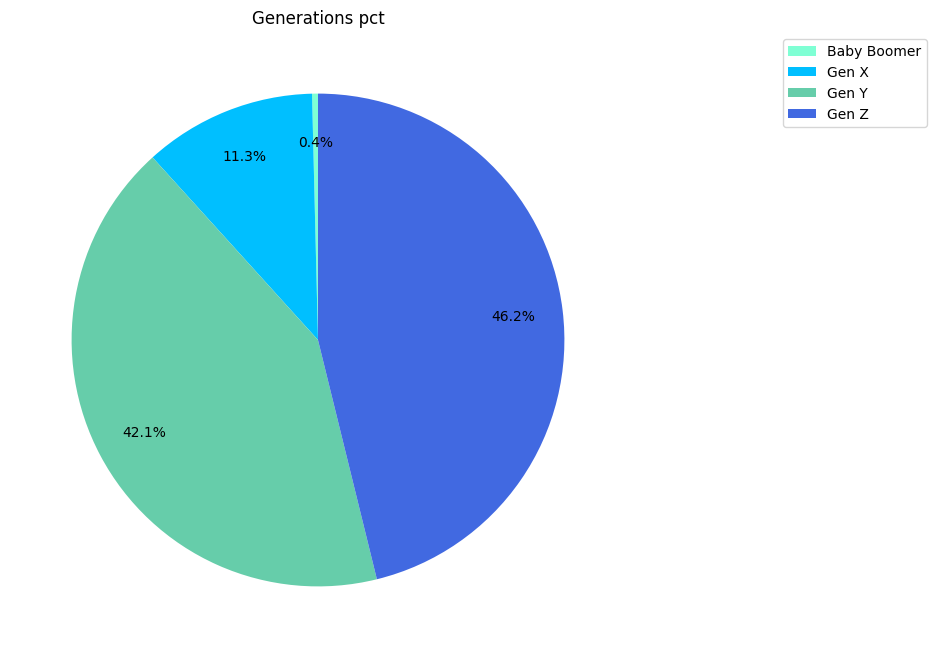

In [ ]:
plt.figure(figsize = (10, 8))
plt.pie(df_gen['total_cus'],
        colors = df_gen['Generations'].replace({ 'Gen Z': 'royalblue',  'Gen Y': 'mediumaquamarine', 'Gen X': 'deepskyblue', 'Baby Boomer': 'aquamarine'}),
        autopct = '%1.01f%%',
        startangle = 90,
        pctdistance = 0.8)
plt.legend(df_gen['Generations'], bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Generations pct')

# **5. Success Rate**

**Success Rate**

In [ ]:
# Success orders
df_joined['order_status'] = df_joined['description'].apply(lambda x: 'Success' if x == 'Order successful'
                                                                       else 'Unsuccess')

In [ ]:
df_success = df_joined.groupby('order_status').agg(
    total_order = ('ticket_id', 'nunique')
).reset_index()

In [ ]:
df_success

,order_status,total_order
0,Success,133679
1,Unsuccess,21046


Text(0.5, 1.0, 'Success & Unsuccess rate')

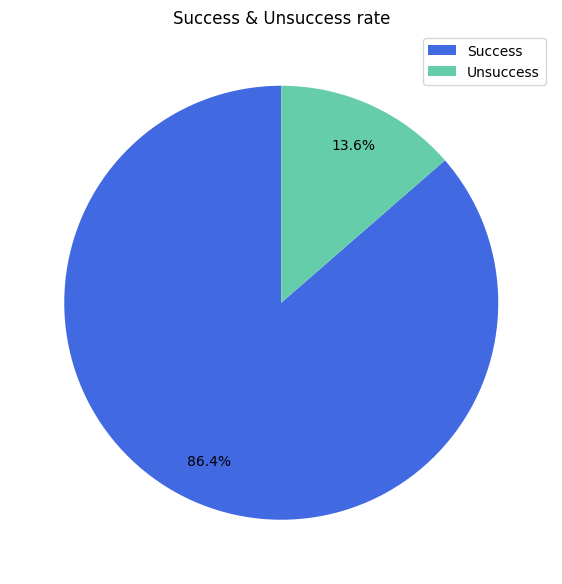

In [ ]:
# Pie chart
plt.figure(figsize = (7, 8))
plt.pie(df_success['total_order'],
        colors = df_success['order_status'].replace({ 'Success': 'royalblue',  'Unsuccess': 'mediumaquamarine'}),
        autopct = '%1.01f%%',
        startangle = 90,
        pctdistance = 0.8)
plt.legend(df_success['order_status'])
plt.title('Success & Unsuccess rate')

**Success & Unsuccess trends**

In [ ]:
# Trends by Weekdays
order_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_success_days = df_joined.groupby(['Weekdays', 'order_status']).agg(
    total_order = ('ticket_id', 'count')
).reset_index()

df_success_days['Weekdays'] = pd.Categorical(df_success_days['Weekdays'], categories = order_weekday, ordered = True)
df_success_days = df_success_days.sort_values(by = 'Weekdays')

# Trends by Hour
df_success_hour = df_joined.groupby(['Hour', 'order_status']).agg(
    total_order = ('ticket_id', 'count')
).pivot_table(index = 'Hour', columns = 'order_status', values = 'total_order').reset_index()

In [ ]:
# Pivot weekdays
df_success_days = df_success_days.pivot_table(index = 'Weekdays', columns = 'order_status', values = 'total_order').reset_index()

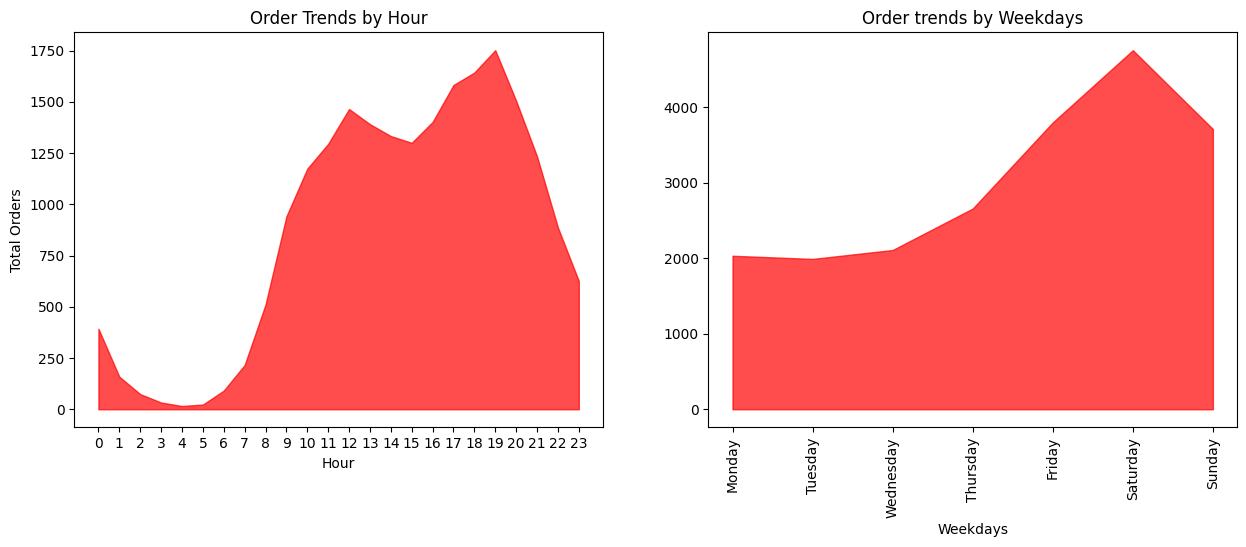

In [ ]:
# Tạo plot
plt.figure(figsize=(15, 5))

# Success & Failed trends by Hour
ax2 = plt.subplot(1, 2, 1)
plt.fill_between(df_success_hour['Hour'], df_success_hour['Unsuccess'], color='red', label='Unsuccess', alpha = 0.7)
plt.xlabel('Hour')
plt.ylabel('Total Orders')
plt.xticks(range(0, 24))
plt.title('Order Trends by Hour')

# Order trends by Weekdays
ax3 = plt.subplot(1, 2, 2)
plt.fill_between(df_success_days['Weekdays'], df_success_days['Unsuccess'], color='red', label='Unsuccess', alpha = 0.7)
plt.xlabel('Weekdays')
plt.xticks(df_success_days['Weekdays'], rotation=90)
plt.title('Order trends by Weekdays')

plt.subplots_adjust(hspace=0.5, top=0.9)
plt.show()

**Which types of error appear the most ?**

In [ ]:
df_joined[df_joined['error_group'] == 'unknown']['description'].unique()

array(['Order successful'], dtype=object)

In [ ]:
# Error group
df_error_group = df_joined[df_joined['order_status'] == 'Unsuccess'].groupby('error_group').agg(
    total_order = ('ticket_id', 'count')
).reset_index().sort_values(by = 'total_order', ascending = False)

In [ ]:
df_status

,status_id,description,error_group
0,1,Order successful,unknown
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please...,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect atte...,customer
5,-5,Payment failed from bank,external
6,-6,Need verify your account to continue,customer
7,-7,Transaction temporarily limited,internal


Text(0.5, 1.0, 'Error group Rate')

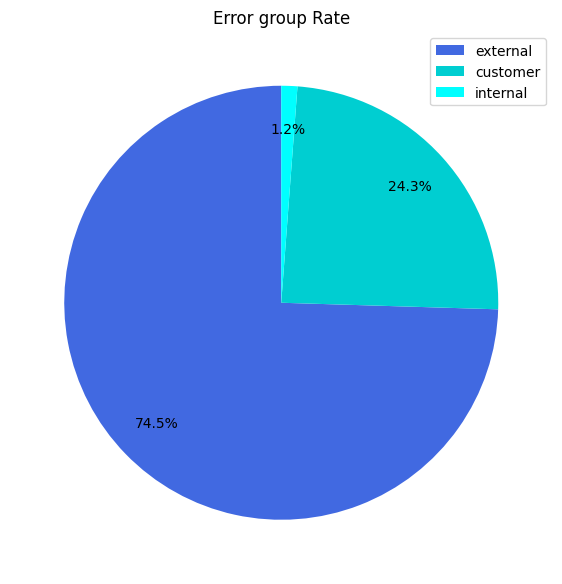

In [ ]:
# Visualize
plt.figure(figsize = (7, 8))
plt.pie(df_error_group['total_order'],
        colors = df_error_group['error_group'].replace({ 'external': 'royalblue',  'internal': 'cyan', 'customer' : 'darkturquoise'}),
        autopct = '%1.01f%%',
        startangle = 90,
        pctdistance = 0.8)
plt.legend(df_error_group['error_group'])
plt.title('Error group Rate')

In [ ]:
df_joined['description'].replace('Insufficient funds in customer account. Please add more funds and try the transaction again.', 'Insufficient funds', inplace = True)
df_joined['description'].replace('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.', 'Incorrect passwords', inplace = True)

In [ ]:
df_error = df_joined[df_joined['order_status'] == 'Unsuccess'].groupby('description').agg(
    total_order = ('ticket_id', 'count')
).reset_index().sort_values(by = 'total_order', ascending = False)

Text(0.5, 1.0, 'Unsuccess order by Description')

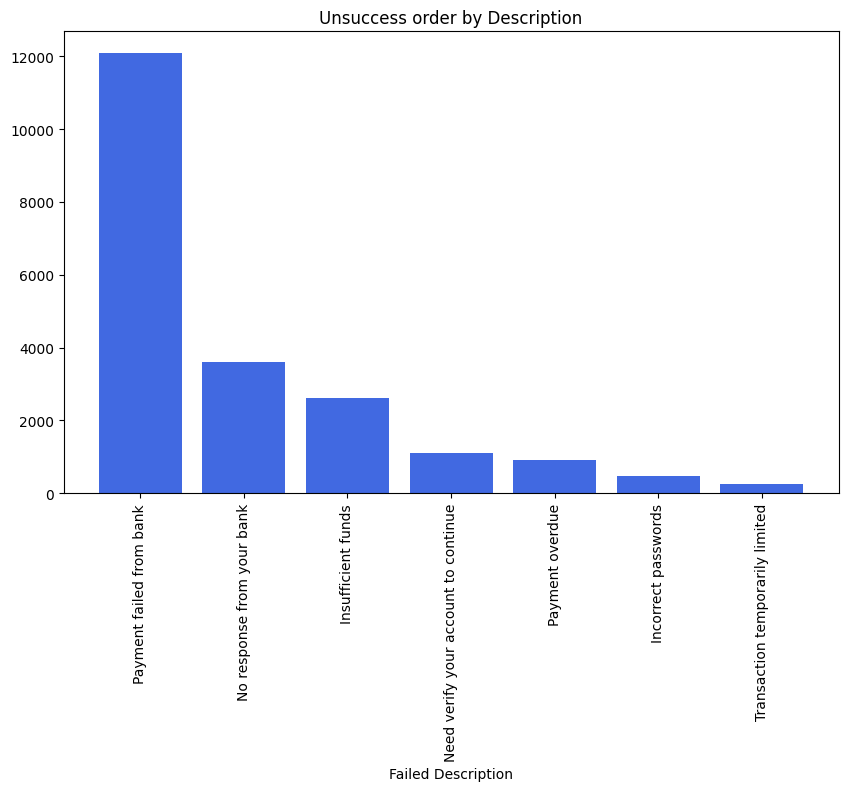

In [ ]:
plt.figure(figsize = (10,6))
# Bar chart
plt.bar(df_error['description'], df_error['total_order'], color = 'royalblue')
plt.xticks(rotation = 90)
plt.xlabel('Failed Description')
plt.title('Unsuccess order by Description')

**Success Rate by Month**

Text(0.5, 1.0, 'Payment success rate by months')

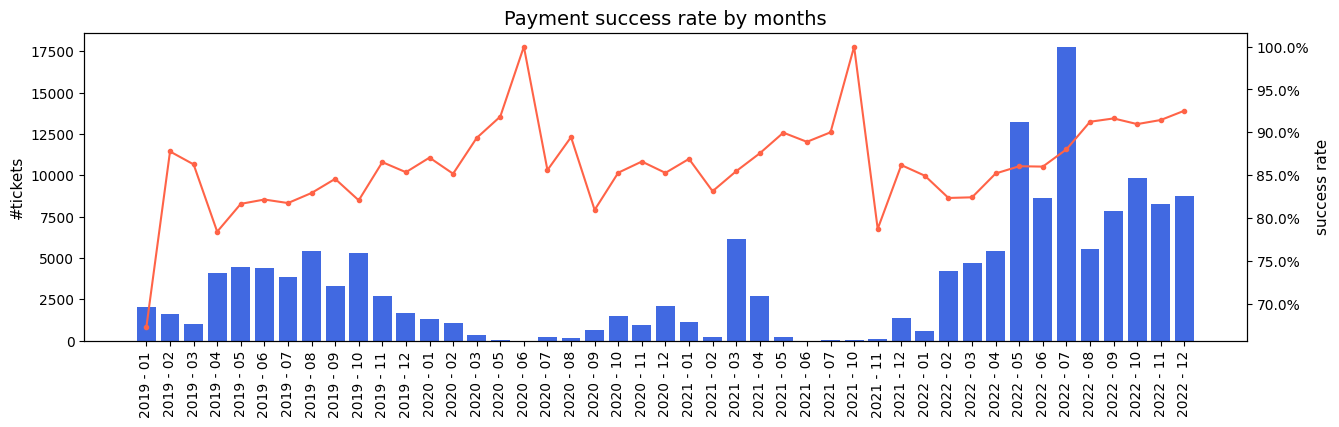

In [ ]:
def calculate_n_success(x):
    return (x == 1).sum()

df_sr = (
    df_joined
    .groupby('year_month')
    .agg(n_ords = ('ticket_id', 'count'), # total ticket
         n_success = ('status_id', calculate_n_success)) # success ticket
    .assign(success_rate=lambda x: (x['n_success'] / x['n_ords']) * 100) # tạo thêm 1 column tính SR
    .reset_index()
)

# Vẽ biểu đồ cột và đường

from matplotlib.ticker import PercentFormatter

fig, ax1 = plt.subplots(figsize=(15,4))

ax1.bar(df_sr['year_month'], df_sr['n_ords'], color="royalblue")
plt.ylabel('#tickets', fontsize=11)
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(df_sr['year_month'], df_sr['success_rate'], color="tomato", marker="o", ms=3)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.ylabel('success rate', fontsize=11)
plt.title('Payment success rate by months', fontsize=14)

# **6. Factors analysis**

**Payment method**

In [ ]:
df_merge_time = pd.merge(dim_time, df_joined, how = 'left', on = 'year_month')

In [ ]:
df_method = (
    df_joined[(df_joined['status_id'] == 1) & (df_joined['paying_method'] != 'other')]
    .groupby('paying_method')
    .agg(total_order=('ticket_id', 'count'))
    .reset_index()
    .sort_values(by='total_order', ascending=True)
)

In [ ]:
df_method_time = (
    df_merge_time[(df_merge_time['status_id'] == 1) & (df_merge_time['paying_method'] != 'other')]
    .groupby(['year_month', 'paying_method'])
    .agg(total_order=('ticket_id', 'count'))
    .pivot_table(index = 'year_month', columns = 'paying_method', values = 'total_order')
    .reset_index()
)

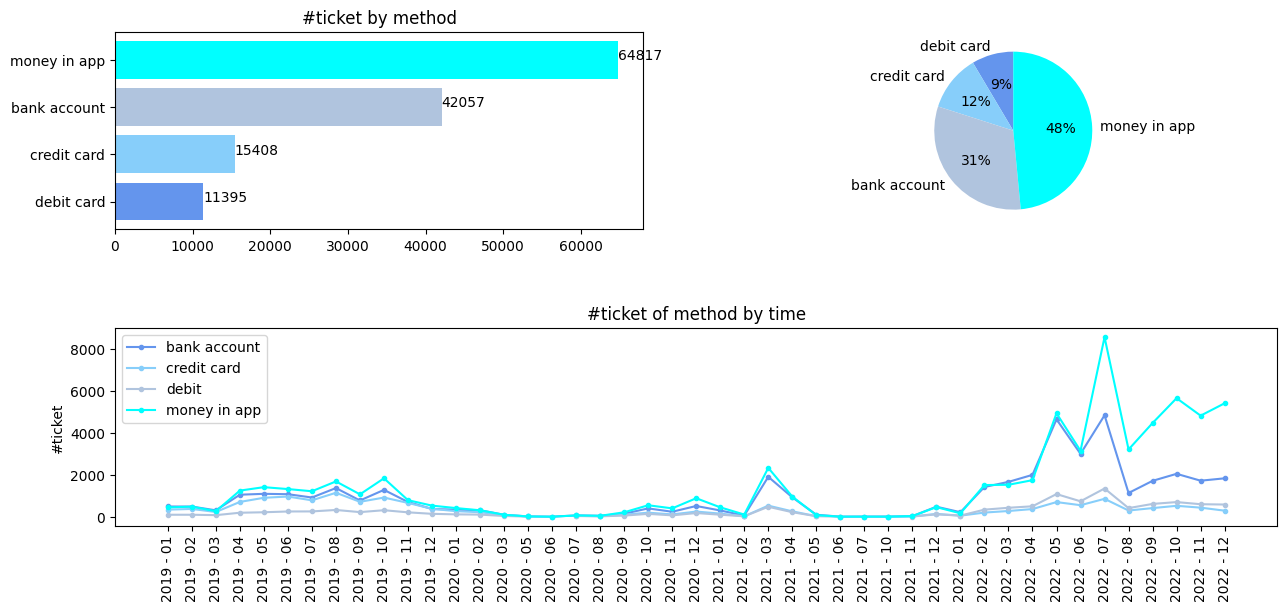

In [ ]:
plt.figure(figsize = (15, 10))
# Chart 1: Number of ticket by Method
ax1 = plt.subplot(3,2,1)
plt.barh(
    df_method['paying_method'], df_method['total_order'],
    color = df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'cyan'})
)

for index,value in enumerate(df_method['total_order']):
    plt.text(value,index,str(value))
plt.title('#ticket by method')

# Chart 2: Pct of method
ax2 = plt.subplot(3,2,2)
plt.pie(df_method['total_order'], labels= df_method['paying_method'],
        colors=df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'cyan'}),
        autopct='%1.0f%%',
        startangle=90)

# Method trends
ax3 = plt.subplot(3,1,2)
plt.plot(df_method_time['year_month'], df_method_time['bank account'], color='cornflowerblue', label='bank account', marker = 'o', markersize = 3)
plt.plot(df_method_time['year_month'], df_method_time['credit card'], color='lightskyblue', label='credit card', marker = 'o', markersize = 3)
plt.plot(df_method_time['year_month'], df_method_time['debit card'], color='lightsteelblue', label='debit', marker = 'o', markersize = 3)
plt.plot(df_method_time['year_month'], df_method_time['money in app'], color='cyan', label='money in app', marker = 'o', markersize = 3)
plt.title('#ticket of method by time')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.subplots_adjust( hspace = 0.5, top= 0.9)

**Platform**

In [ ]:
# Order by platform
df_platform = df_joined[df_joined['platform'] != 'unknown'].groupby('platform').agg(
    total_order = ('ticket_id', 'count')
).reset_index()

Text(0.5, 1.0, '#ticket by platform')

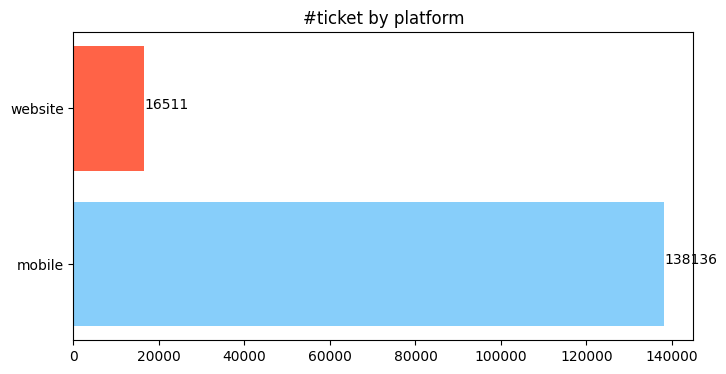

In [ ]:
# Visualize
plt.figure(figsize=(8, 4))

plt.barh(
    df_platform['platform'], df_platform['total_order'],
    color = df_platform['platform'].replace({ 'mobile': 'lightskyblue',  'website': 'tomato'})
)

for index,value in enumerate(df_platform['total_order']):
    plt.text(value,index,str(value))

plt.title('#ticket by platform')

In [ ]:
df_platform_time = df_joined[df_joined['platform'] != 'unknown'].groupby(['year_month', 'platform']).agg(
    total_order = ('ticket_id', 'count')
).pivot_table(index = 'year_month', columns = 'platform', values = 'total_order').reset_index()

([<matplotlib.patches.Wedge at 0x780cbd07ac20>,
 [Text(-0.3620766457968882, -1.0387013538878607, 'mobile'),
  Text(0.362076694422008, 1.0387013369378284, 'website')],
 [Text(-0.1974963522528481, -0.566564374847924, '89%'),
  Text(0.19749637877564072, 0.5665643656024517, '11%')])

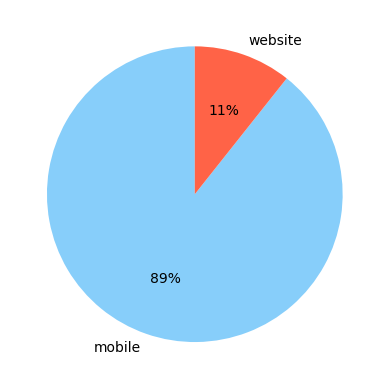

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, '2019 - 01'),
  Text(1, 0, '2019 - 02'),
  Text(2, 0, '2019 - 03'),
  Text(3, 0, '2019 - 04'),
  Text(4, 0, '2019 - 05'),
  Text(5, 0, '2019 - 06'),
  Text(6, 0, '2019 - 07'),
  Text(7, 0, '2019 - 08'),
  Text(8, 0, '2019 - 09'),
  Text(9, 0, '2019 - 10'),
  Text(10, 0, '2019 - 11'),
  Text(11, 0, '2019 - 12'),
  Text(12, 0, '2020 - 01'),
  Text(13, 0, '2020 - 02'),
  Text(14, 0, '2020 - 03'),
  Text(15, 0, '2020 - 05'),
  Text(16, 0, '2020 - 06'),
  Text(17, 0, '2020 - 07'),
  Text(18, 0, '2020 - 08'),
  Text(19, 0, '2020 - 09'),
  Text(20, 0, '2020 - 10'),
  Text(21, 0, '2020 - 11'),
  Text(22, 0, '2020 - 12'),
  Text(23, 0, '2021 - 01'),
  Text(24, 0, '2021 - 02'),
  Text(25, 0, '2021 - 03'),
  Text(26, 0, '2021 -

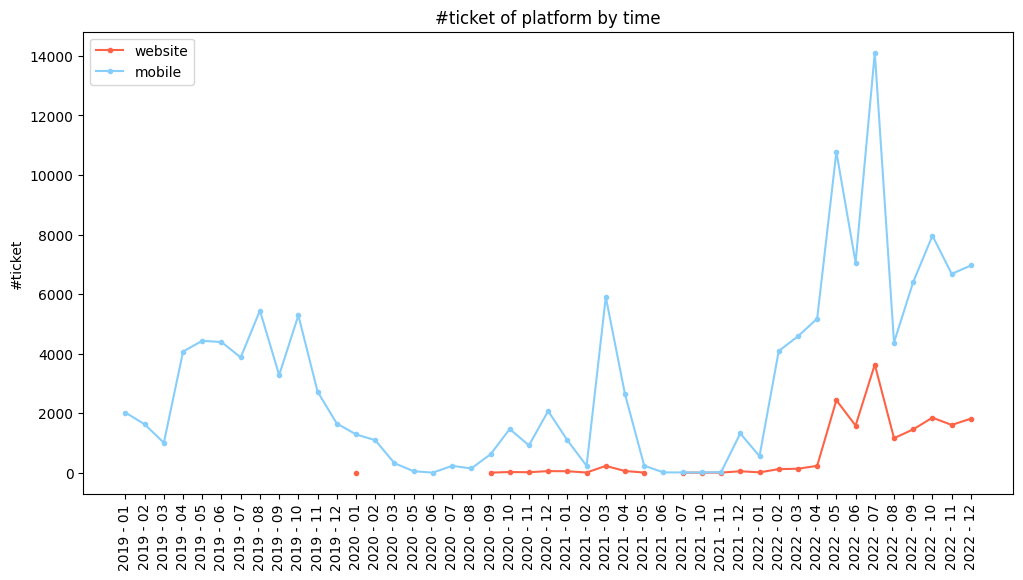

In [ ]:
# Visualize chart
plt.figure(figsize = (12, 6))
plt.plot(df_platform_time['year_month'], df_platform_time['website'], color='tomato', label='website', marker = 'o', markersize = 3)
plt.plot(df_platform_time['year_month'], df_platform_time['mobile'], color='lightskyblue', label='mobile', marker = 'o', markersize = 3)
plt.title('#ticket of platform by time')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

In [ ]:
# OS versions
df_joined['os_version'] = df_joined['model'].apply(lambda x: 'IOS' if ('iPhone' in x or 'iPod' in x)
                                                             else 'Browser' if x.find('browser') > -1
                                                             else 'Unknown' if ('devicemodel' in x or 'Unknown' in x)
                                                             else 'Android & Others')

In [ ]:
df_os = df_joined.groupby(['os_version']).agg(
    total_order = ('ticket_id', 'count')
).reset_index().sort_values(by = 'total_order', ascending = True)

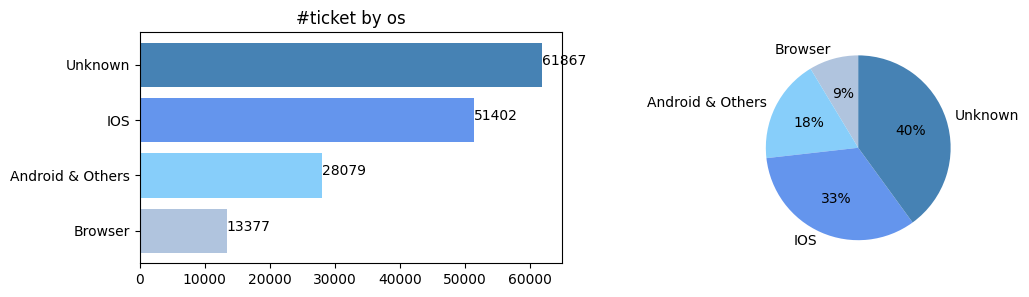

In [ ]:
# Horizontal bar :
plt.figure(figsize=(12, 3))

ax1 = plt.subplot(1,2,1)
plt.barh(
    df_os['os_version'], df_os['total_order'],
    color = df_os['os_version'].replace({ 'Browser': 'lightsteelblue',  'Android & Others': 'lightskyblue', 'IOS': 'cornflowerblue', 'Unknown': 'steelblue'})
)

for index,value in enumerate(df_os['total_order']):
    plt.text(value,index,str(value))
plt.title('#ticket by os')

ax2 = plt.subplot(1,2,2)
plt.pie(df_os['total_order'], labels= df_os['os_version'],
        colors=df_os['os_version'].replace({ 'Browser': 'lightsteelblue',  'Android & Others': 'lightskyblue', 'IOS': 'cornflowerblue', 'Unknown': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)
plt.show()

**Promotion Campaigns**

In [ ]:
df_joined['promo_status'] = df_joined['campaign_id'].apply(lambda x: 'Non - promotion' if x == 0
                                                                      else 'Promotion')

In [ ]:
# Data
df_promo = df_joined.groupby('promo_status').agg(
    total_order = ('ticket_id', 'count')
).reset_index()

In [ ]:
df_promo_time = df_joined.groupby(['year_month', 'promo_status']).agg(
    total_order = ('ticket_id', 'count')
).pivot_table(index = 'year_month', columns = 'promo_status', values = 'total_order').reset_index()

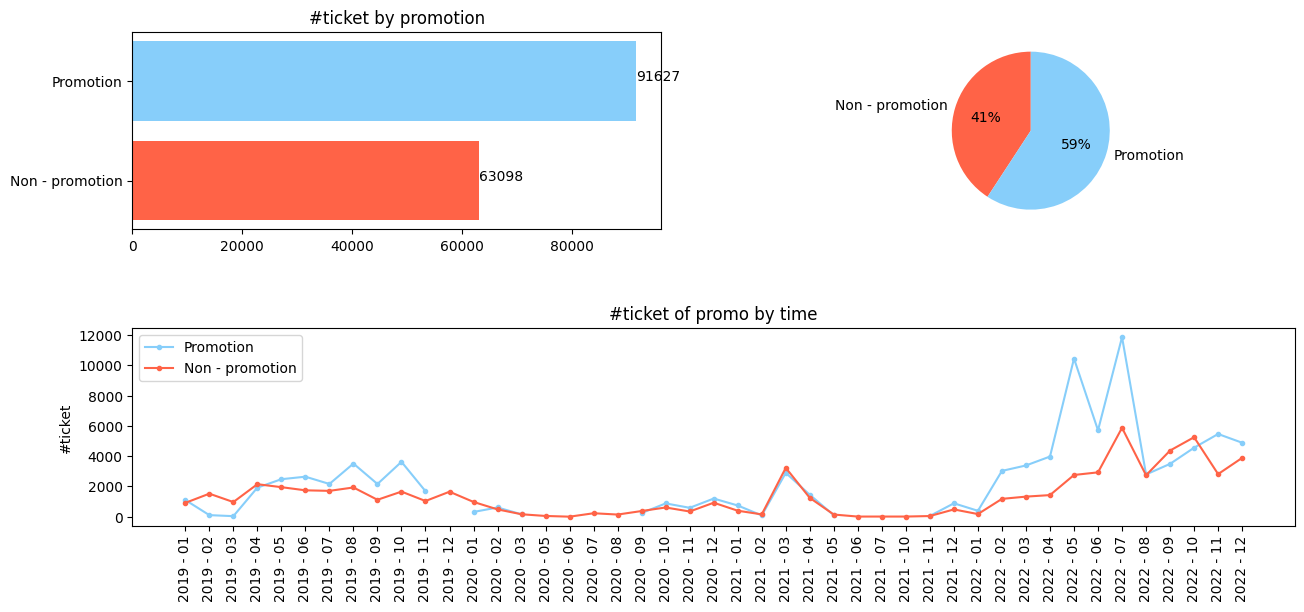

In [ ]:
plt.figure(figsize = (15, 10))

# Horizontal bar :
ax1 = plt.subplot(3,2,1)
plt.barh(
    df_promo['promo_status'], df_promo['total_order'],
    color = df_promo['promo_status'].replace({ 'Promotion': 'lightskyblue', 'Non - promotion': 'tomato'})
)

for index,value in enumerate(df_promo['total_order']):
    plt.text(value,index,str(value))
plt.title('#ticket by promotion')

# Pie chart
ax2 = plt.subplot(3,2,2)
plt.pie(df_promo['total_order'], labels= df_promo['promo_status'],
        colors=df_promo['promo_status'].replace({ 'Non - promotion': 'tomato', 'Promotion': 'lightskyblue'}),
        autopct='%1.0f%%',
        startangle=90)

# Trends
ax3 = plt.subplot(3,1,2)
plt.plot(df_promo_time['year_month'], df_promo_time['Promotion'], color='lightskyblue', label='Promotion', marker = 'o', markersize = 3)
plt.plot(df_promo_time['year_month'], df_promo_time['Non - promotion'], color='tomato', label='Non - promotion', marker = 'o', markersize = 3)
plt.title('#ticket of promo by time')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.subplots_adjust( hspace = 0.5, top= 0.9)

In [ ]:
# Which types of promotion was used the most ?
df_promo_type = df_joined[(df_joined['campaign_id'] != 0) & (df_joined['status_id'] == 1)].groupby('campaign_type').agg(
    total_order = ('ticket_id', 'count')
).reset_index().sort_values(by = 'total_order', ascending = True)

([<matplotlib.patches.Wedge at 0x780cc4db3010>,
 [Text(-0.1382630055632627, 1.0912760151733445, 'reward point'),
  Text(-0.5552069057589085, 0.9496027020799902, 'voucher'),
  Text(0.43144456086703964, -1.0118574953511228, 'direct discount')],
 [Text(-0.07541618485268875, 0.5952414628218242, '4%'),
  Text(-0.30284013041395, 0.5179651102254491, '9%'),
  Text(0.23533339683656704, -0.5519222701915214, '87%')])

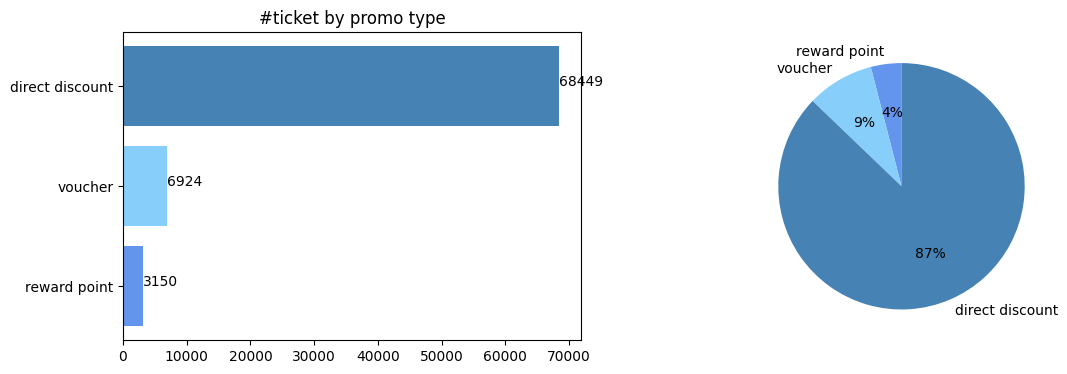

In [ ]:
plt.figure(figsize = (13, 4))

# Horizontal bar :
ax1 = plt.subplot(1,2,1)
plt.barh(
    df_promo_type['campaign_type'], df_promo_type['total_order'],
    color = df_promo_type['campaign_type'].replace({ 'direct discount': 'steelblue', 'reward point': 'cornflowerblue', 'voucher' : 'lightskyblue'})
)

for index,value in enumerate(df_promo_type['total_order']):
    plt.text(value,index,str(value))
plt.title('#ticket by promo type')

# Pie chart
ax2 = plt.subplot(1,2,2)
plt.pie(df_promo_type['total_order'], labels= df_promo_type['campaign_type'],
        colors=df_promo_type['campaign_type'].replace({ 'direct discount': 'steelblue', 'reward point': 'cornflowerblue', 'voucher' : 'lightskyblue'}),
        autopct='%1.0f%%',
        startangle=90)

# **7. Customer Values**

**Number of customers**

In [ ]:
df_joined['year'] = df_joined['time'].dt.year

In [ ]:
df_cus = df_joined.groupby('year').agg(
    total_cus = ('customer_id', 'nunique')
).reset_index().sort_values(by = 'year', ascending = True)

Text(0.5, 1.0, 'Number of Customers by Year')

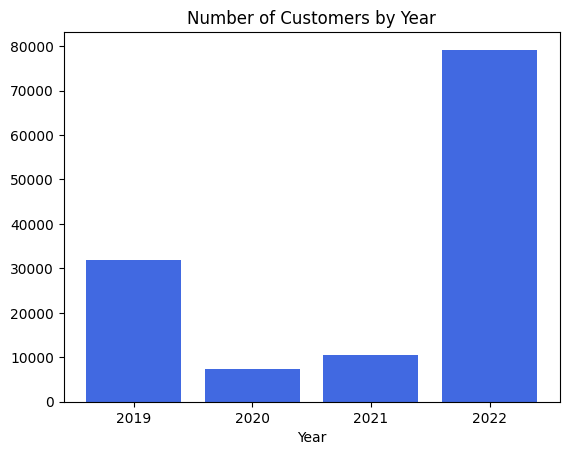

In [ ]:
# Bar chart
plt.bar(df_cus['year'], df_cus['total_cus'], color = 'royalblue')
plt.xlabel('Year')
plt.xticks(range(2019, 2023))
plt.title('Number of Customers by Year')

**Customer Values**

In [ ]:
# Promo functions
def calculate_promo (x):
  return (x == 'Promotion').sum()

# Success metrics
df_success_metrics = (
    df_joined[df_joined['status_id'] == 1]
    .assign(date = pd.to_datetime(df_joined['time']).dt.date)
    .groupby('customer_id')
    .agg(
        n_success = ('ticket_id', 'count'),
        s_money = ('original_price', 'sum'),
        s_discount = ('discount_value', 'sum'),
        n_days = ('date', 'nunique'),
        n_month = ('year_month', 'nunique'),
        n_promo = ('promo_status', calculate_promo)
    )
    .reset_index()
)

In [ ]:
# Failed functions
def calculate_failed (x):
  return (x == 'Unsuccess').sum()

# Failed metrics
df_failed_metrics = (
    df_joined.groupby('customer_id')
    .agg(
        n_failed = ('order_status', calculate_failed),
        n_total = ('ticket_id', 'count')
    )
    .reset_index()
)

In [ ]:
df_customer_values = pd.merge(df_failed_metrics, df_success_metrics, how ='left', on = 'customer_id').fillna(0)

In [ ]:
df_customer_values['success_rate'] = df_customer_values['n_success'] / df_customer_values['n_total']
df_customer_values['promo_rate'] = df_customer_values['n_promo'] / df_customer_values['n_success']
df_customer_values['discount_rate'] = df_customer_values['s_discount'] / df_customer_values['s_money']

In [ ]:
df_customer_values

,customer_id,n_failed,n_total,n_success,s_money,s_discount,n_days,n_month,n_promo,success_rate,promo_rate,discount_rate
0,100001,0,1,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628
1,100003,0,6,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002
2,100004,0,1,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000
3,100005,0,1,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071
4,100006,0,1,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
119472,231393,0,1,1.0,14.39,1.65,1.0,1.0,1.0,1.0,1.000000,0.114663
119473,231395,0,1,1.0,5.16,1.90,1.0,1.0,1.0,1.0,1.000000,0.368217
119474,231397,0,1,1.0,10.72,1.65,1.0,1.0,1.0,1.0,1.000000,0.153918
119475,231398,0,1,1.0,11.92,1.24,1.0,1.0,1.0,1.0,1.000000,0.104027


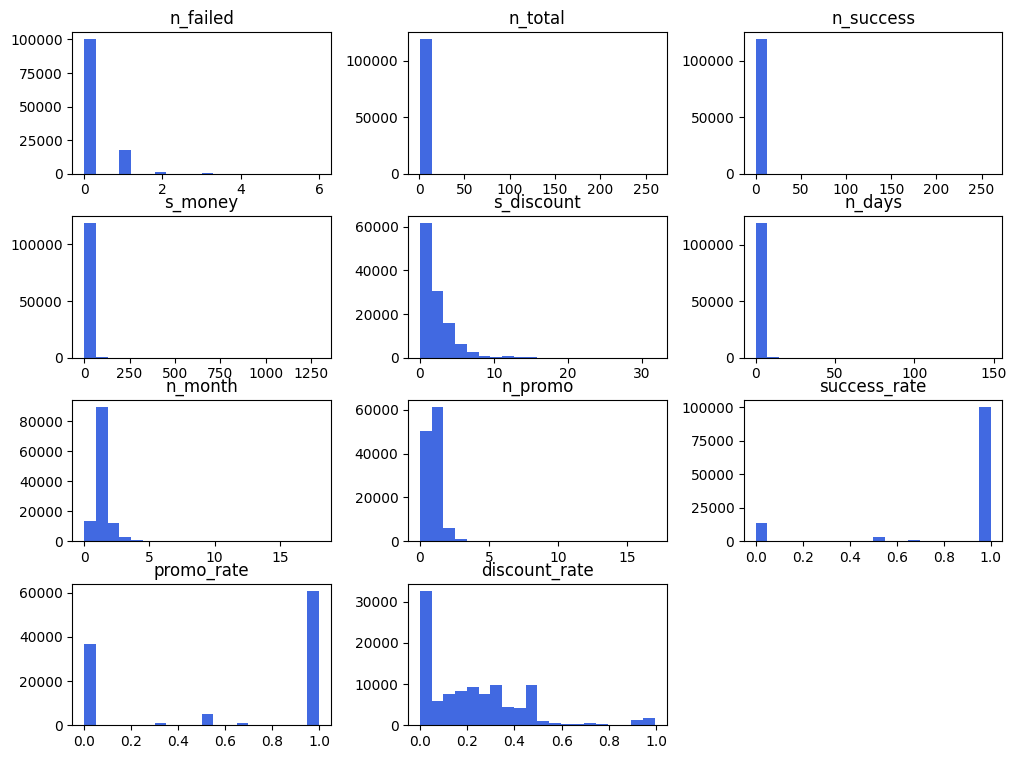

In [ ]:
# Visualize
df_customer_values.iloc[:, 1:].hist(figsize = (12, 9), grid = False, color = 'royalblue', bins = 20)
plt.show()



*   Success Rate: 10% of customers always failed -> Reasons?
*   Some customers bought lots of tickets - Need to check.
*   There are 60,000 customers with a discount rate of 100%.
*   60,000 customers had only one promotion and then stopped. (Is there any relationships with the customers group who have discount rate = 100%? )




**Anomaly Behavior Analysis**

In [ ]:
df_customer_values['n_order_dis'] = df_customer_values['n_success'].apply(lambda x: 'more than 10' if x >= 10 else str(x))

In [ ]:
df_order = df_customer_values.groupby('n_order_dis').agg(
    total_order = ('n_success', 'count')
).reset_index()

Text(0.5, 1.0, '#ticket by each group')

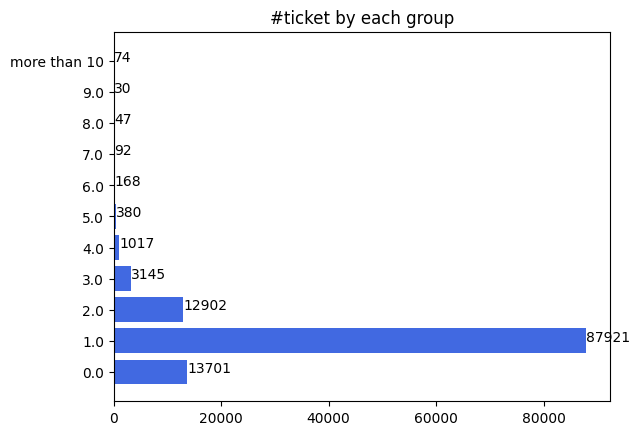

In [ ]:
plt.barh(
    df_order['n_order_dis'], df_order['total_order'],
    color = 'royalblue'
)

for index,value in enumerate(df_order['total_order']):
    plt.text(value,index,str(value))
plt.title('#ticket by each group')

In [ ]:
list_massive_customers = list(df_customer_values[df_customer_values['n_success'] > 30]['customer_id'].unique())

In [ ]:
df_customer_massive = (
    df_joined[(df_joined['customer_id'].isin(list_massive_customers)) & (df_joined['status_id'] == 1)]
    .pivot_table(index = 'year_month', columns = 'customer_id', aggfunc = 'count', values = 'ticket_id')
    .reset_index()
)

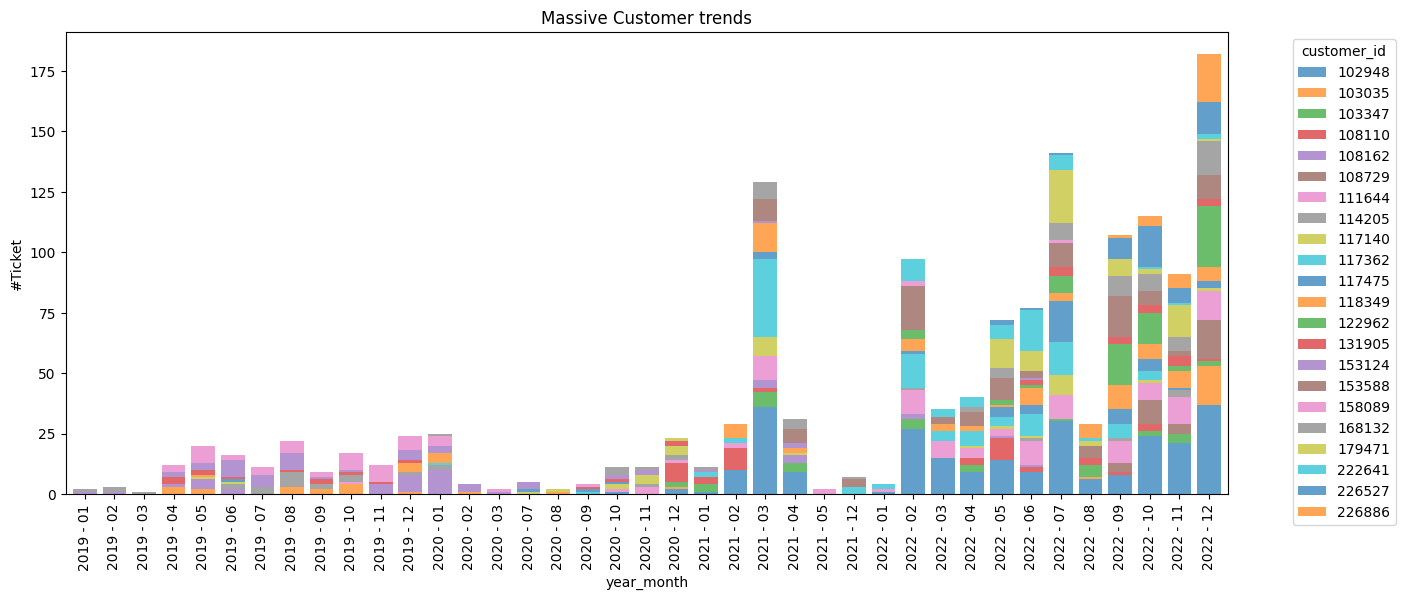

In [ ]:
# Bar chart
ax = df_customer_massive.plot(x = 'year_month', kind = 'bar', stacked = True, figsize = (15, 6), width = 0.8, alpha = 0.7)

# Settings
ax.set_title('Massive Customer trends')
ax.set_ylabel('#Ticket')
plt.legend(title = 'customer_id', loc = 'upper right', bbox_to_anchor = (1.15, 1))
plt.show()

>>> There are customers who buy more than 250 movie tickets, but the most they purchase at one time is 30 tickets. They spread out their purchases, so there is nothing unusual about it.

In [ ]:
df_customer_values['n_promo_dis'] = df_customer_values['n_promo'].apply(lambda x: 'more than 10' if x >= 10 else str(x))

In [ ]:
df_promo_dis = df_customer_values.groupby('n_promo_dis').agg(
    total_order = ('n_success', 'count')
).reset_index()

In [ ]:
df_promo_dis

,n_promo_dis,total_order
0,0.0,50498
1,1.0,61334
2,2.0,6264
3,3.0,1042
4,4.0,230
5,5.0,74
6,6.0,19
7,7.0,10
8,8.0,2
9,9.0,2


Text(0.5, 1.0, 'promotion ticket by each group')

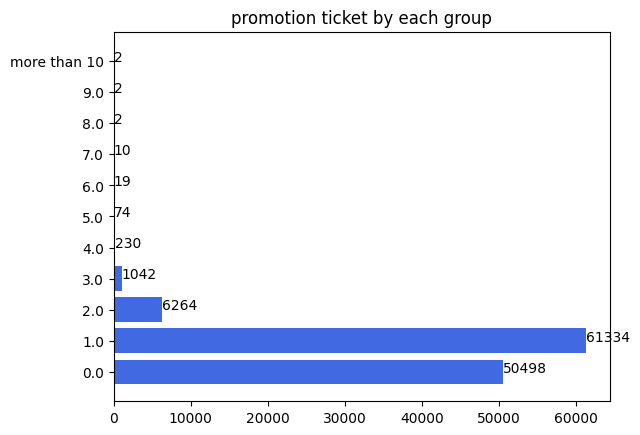

In [ ]:
plt.barh(
    df_promo_dis['n_promo_dis'], df_promo_dis['total_order'],
    color = 'royalblue'
)

for index,value in enumerate(df_promo_dis['total_order']):
    plt.text(value,index,str(value))
plt.title('promotion ticket by each group')

In [ ]:
# Promo type pct in each group
df_success_promo = (
    df_joined[(df_joined['status_id'] == 1) & (df_joined['promo_status'] == 'Promotion')]
    .groupby('customer_id')
    .agg(n_promo = ('ticket_id', 'count'))
)

In [ ]:
df_n_pivot = (
    df_joined[(df_joined['status_id'] == 1) & (df_joined['promo_status'] == 'Promotion')]
    .pivot_table(index = 'customer_id', columns = 'campaign_type', aggfunc = 'count', values = 'ticket_id')
    .reset_index()
)

In [ ]:
df_n_join = (
    pd.merge(df_success_promo, df_n_pivot, how = 'inner', on = 'customer_id')
    .groupby('n_promo')
    .agg(
        n_customer = ('customer_id', 'nunique'),
        n_discount = ('direct discount', 'sum'),
        n_voucher  = ('voucher', 'sum'),
        n_reward = ('reward point', 'sum')
    )
    .reset_index()
)

In [ ]:
df_n_join['total'] = df_n_join.iloc[:, 2:].sum(axis = 1)

In [ ]:
df_n_join['discount_pct'] = df_n_join['n_discount'] / df_n_join['total']
df_n_join['voucher_pct'] = df_n_join['n_voucher'] / df_n_join['total']
df_n_join['reward_pct'] = df_n_join['n_reward'] / df_n_join['total']

In [ ]:
format_dict = {'total' : '{:.0f}', 'discount_pct' : '{:.0%}', 'voucher_pct' : '{:.0%}', 'reward_pct' : '{:.0%}'}

In [ ]:
# Heat map
(
    df_n_join
    .drop(columns = ['n_discount', 'n_voucher', 'n_reward'])
    .style
    .format(format_dict)
    .background_gradient(subset = ['total', 'discount_pct', 'voucher_pct', 'reward_pct'], cmap = 'PuBu')
)

,n_promo,n_customer,total,discount_pct,voucher_pct,reward_pct
0,1,61334,61334,87%,9%,5%
1,2,6264,12528,90%,9%,2%
2,3,1042,3126,89%,9%,1%
3,4,230,920,90%,9%,1%
4,5,74,370,87%,12%,1%
5,6,19,114,89%,11%,0%
6,7,10,70,77%,20%,3%
7,8,2,16,88%,12%,0%
8,9,2,18,67%,33%,0%
9,10,1,10,90%,10%,0%


**Customers Retention**

In [ ]:
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

# Calculate cohort (first_month), current_month, subsequent month

df_selected_time = df_joined[ (df_joined['time'] < '2020-01-01') & (df_joined['status_id'] == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

# Group by cohort

df_cohor = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

# Pivot table
df_cohort_pivot = (
    df_cohor
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)

# Convert into %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)

<ipython-input-107-1e14299b2cab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-107-1e14299b2cab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
<ipython-input-107-1e14299b2cab>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

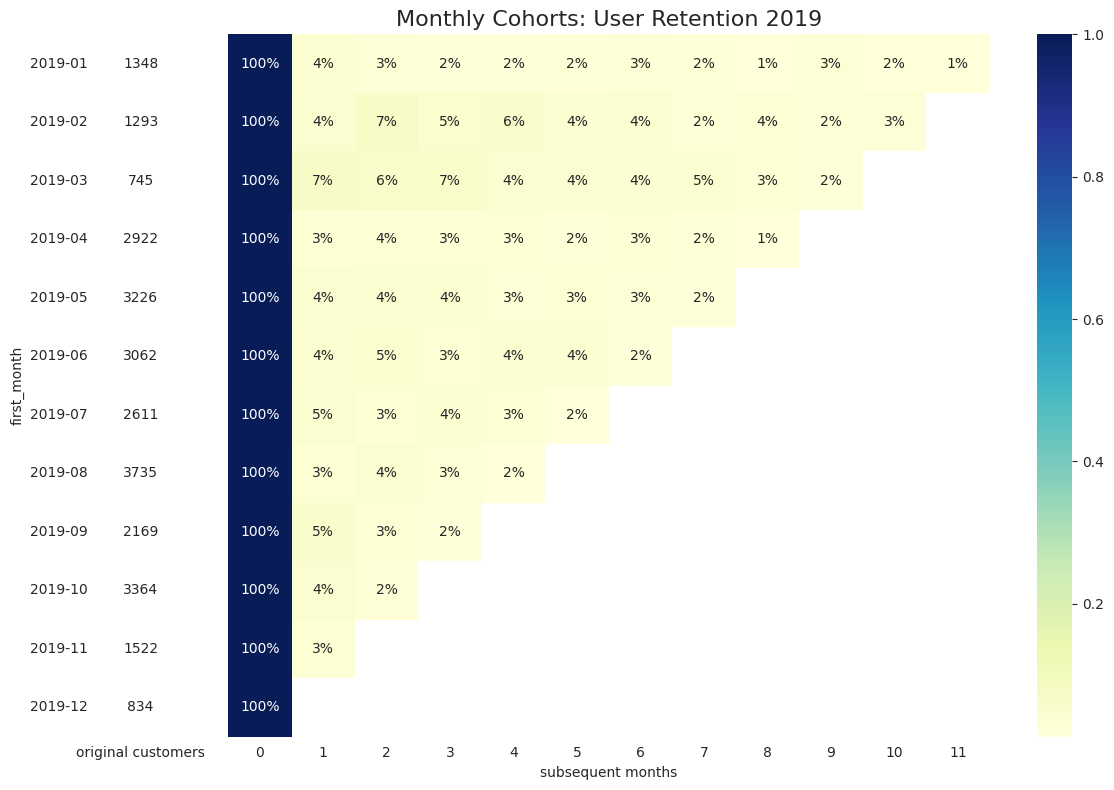

In [ ]:
# Visualize cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2019', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

In [ ]:
# Calculate cohort (first_month), current_month, subsequent month

df_selected_time = df_joined[ (df_joined['time'] > '2022-01-01') & (df_joined['status_id'] == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

# Group by cohort

df_cohor = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

# Pivot table
df_cohort_pivot = (
    df_cohor
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)

# Convert into %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)

<ipython-input-109-7d2cbbb7fb59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-109-7d2cbbb7fb59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
<ipython-input-109-7d2cbbb7fb59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

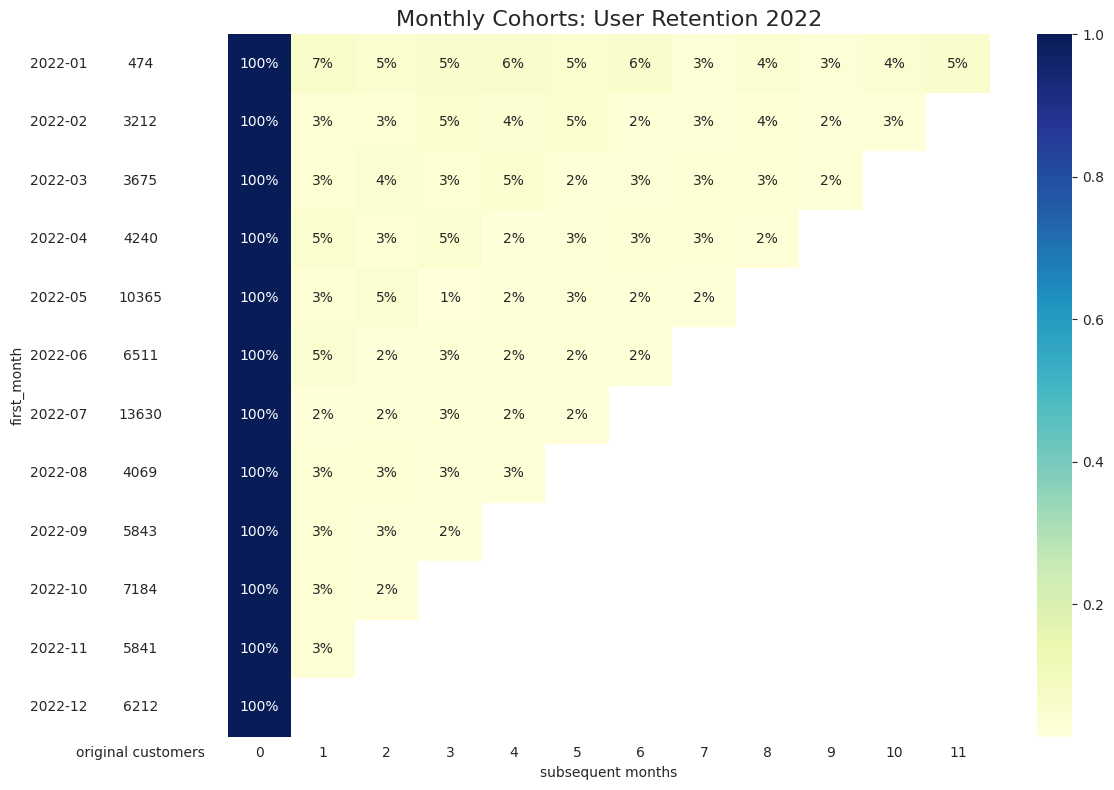

In [ ]:
# Visualize cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()